# ECE 523 Project

In this project, we will be going to predict Miss Rates of the application for a particular dcache retention time providing write Latency, write Energy. We will going to use K_means algorithm to cluster the data based on the write latency and write energy which will be followed by some statistical exploration, calculation, and a regressor to predict the final value.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.utils import shuffle
style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
from scipy.stats import norm
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\gaura\OneDrive\Desktop\Simpoint_data_gem5\user_experience_project\SPEC\d_cache\old\DATA_Classifier.xlsx', 'lat_energy')
df.head()

,application,ret_time,phase no.,Latency,ENERGY
0,astar,10us,1,0.000814,0.000016
1,astar,10us,2,0.000530,0.000010
2,astar,10us,3,0.000536,0.000010
3,bwaves,10us,1,0.012913,0.000203
4,bwaves,10us,2,0.008365,0.000131


### Here we have fixed the retention time = 75us and 10us, and keeping it constant we will going to vary the Latency and Energy of the applications. 

In [4]:
d_ret = '75us'

In [5]:
# splitting the data and scaling it

df_75us = df.loc[df['ret_time'] == '75us']
df_50us = df.loc[df['ret_time'] == '50us']

if d_ret == '75us':
    Data = df_75us
else:
    Data = df_50us

from sklearn.preprocessing import robust_scale
Data.iloc[:,[-2,-1]] = robust_scale(Data.iloc[:,[-2, -1]])    
X_LE_train = Data.iloc[0:int(Data.shape[0]*0.75),:].reset_index(drop=True)
X_LE_test = Data.iloc[int(Data.shape[0]*0.75)+1:,:].reset_index(drop=True)


C:\Users\gaura\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


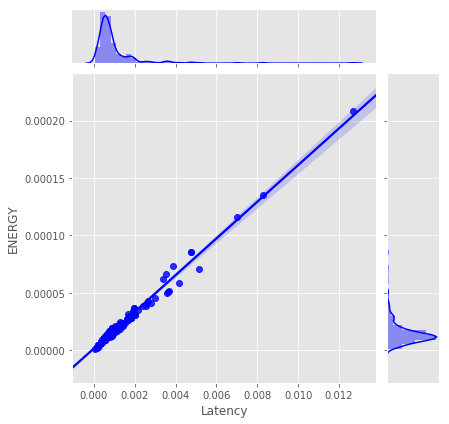

In [6]:
from sklearn.preprocessing import MinMaxScaler
g2 = sns.jointplot(x="Latency", y="ENERGY", data=df_50us.iloc[:, [-2,-1]] ,kind="reg", color = 'blue' )
g2.savefig(r"C:\Users\gaura\OneDrive\Desktop\SUBJECTS\523\project\plots\df_50us.png")

#plt.ylim(0, 0.0005)
#plt.xlim(0, None)

In [7]:
# importing complete stats dataset of dcache=75us and 10us

dataset = pd.read_excel(r'C:\Users\gaura\OneDrive\Desktop\Simpoint_data_gem5\user_experience_project\SPEC\d_cache\old\DATA_Classifier.xlsx', 'Sheet6')
dataset.head()

,application,ret_time,phase no.,system.mem_ctrls.bytes_read::total,system.mem_ctrls.bytes_inst_read::total,system.mem_ctrls.num_reads::total,system.mem_ctrls.bw_read::total,system.mem_ctrls.bw_inst_read::total,system.mem_ctrls.bw_total::total,system.mem_ctrls.readReqs,...,system.switch_cpus.num_int_register_reads,system.switch_cpus.num_int_register_writes,system.switch_cpus.num_fp_register_reads,system.switch_cpus.num_fp_register_writes,system.switch_cpus.num_cc_register_reads,system.switch_cpus.num_cc_register_writes,system.switch_cpus.op_class::total,system.cpu.dcache.overall_miss_rate::total.1,system.cpu.icache.overall_miss_rate::total.1,final_clas
0,astar,10us,1,751552,588224,11743,347379466,271886628,348828975,11743,...,1658406,637793,14449,8899,4080945,602039,1170149,0.006946,0.007837,J
1,astar,10us,2,500992,397440,7828,357642463,283719941,357642463,7828,...,996028,383149,8775,5400,2449680,360852,702551,0.007334,0.008827,J
2,astar,10us,3,500800,397120,7825,357549302,283526316,357549302,7825,...,995903,383127,8762,5392,2449572,360874,702529,0.007345,0.008819,J
3,astar,75us,1,119168,90944,1862,72045689,54982236,72471308,1862,...,1658406,637793,14449,8899,4080945,602039,1170149,0.001207,0.001212,J
4,astar,75us,2,48256,38272,754,49433405,39205804,49433405,754,...,996028,383149,8775,5400,2449680,360852,702551,0.000707,0.000850,J


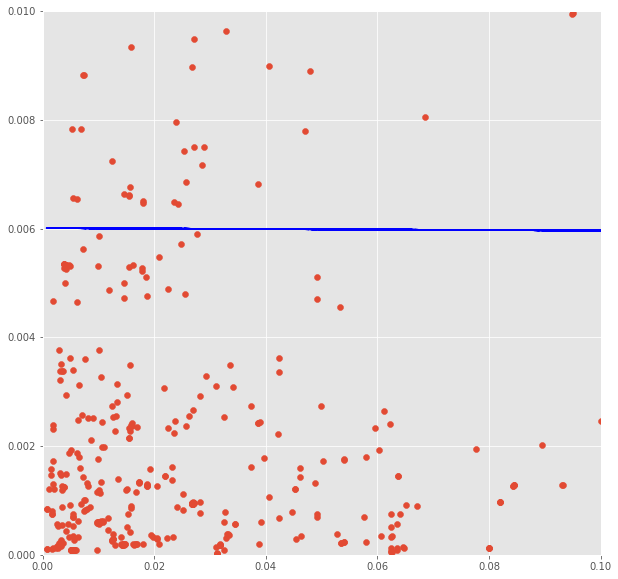

In [8]:
plt.figure(figsize=(10,10))
dataset = dataset.fillna(0)
x = dataset.iloc[:,-3]
y=dataset.iloc[:, -2]
plt.scatter(x, y) 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.axis([0,0.1,0,0.01])
plt.plot(x,p(x),"b--")

plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
dataset_sc = dataset
dataset_sc.iloc[:,3:-2] = MinMaxScaler().fit_transform(dataset.iloc[:,3:-2])

dataset_sc.iloc[:, 3:-2] = np.nan_to_num(dataset_sc.iloc[:, 3:-2])
dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.columns = dataset.columns

In [10]:
dataset_sc.head()

,application,ret_time,phase no.,system.mem_ctrls.bytes_read::total,system.mem_ctrls.bytes_inst_read::total,system.mem_ctrls.num_reads::total,system.mem_ctrls.bw_read::total,system.mem_ctrls.bw_inst_read::total,system.mem_ctrls.bw_total::total,system.mem_ctrls.readReqs,...,system.switch_cpus.num_int_register_reads,system.switch_cpus.num_int_register_writes,system.switch_cpus.num_fp_register_reads,system.switch_cpus.num_fp_register_writes,system.switch_cpus.num_cc_register_reads,system.switch_cpus.num_cc_register_writes,system.switch_cpus.op_class::total,system.cpu.dcache.overall_miss_rate::total.1,system.cpu.icache.overall_miss_rate::total.1,final_clas
0,astar,10us,1,0.032409,0.137513,0.032409,0.191177,0.380991,0.095741,0.032409,...,0.187859,0.714815,0.008893,0.008896,0.544835,0.547385,0.465210,0.011291,0.007837,J
1,astar,10us,2,0.021373,0.092834,0.021373,0.197115,0.397623,0.098284,0.021373,...,0.092100,0.373094,0.005401,0.005398,0.155185,0.318989,0.083677,0.011994,0.008827,J
2,astar,10us,3,0.021365,0.092759,0.021365,0.197061,0.397351,0.098257,0.021365,...,0.092082,0.373064,0.005393,0.005390,0.155159,0.319009,0.083659,0.012014,0.008819,J
3,astar,75us,1,0.004555,0.021058,0.004555,0.031877,0.076128,0.015984,0.004555,...,0.187859,0.714815,0.008893,0.008896,0.544835,0.547385,0.465210,0.000905,0.001212,J
4,astar,75us,2,0.001432,0.008723,0.001432,0.018794,0.053954,0.009335,0.001432,...,0.092100,0.373094,0.005401,0.005398,0.155185,0.318989,0.083677,0.000000,0.000850,J


In [11]:
# cleaning the dataset

Dataset_75us = dataset_sc.loc[dataset['ret_time'] == '75us'].iloc[:, 3:-2]
Dataset_10us = dataset_sc.loc[dataset['ret_time'] == '10us'].iloc[:, 3:-2]

if d_ret == '75us':
    Dataset = Dataset_75us
else: 
    Dataset = Dataset_10us
    
X_stats = Dataset.iloc[:, 0:-1]
y_stats = Dataset.iloc[:, -1]
y_stats = (y_stats*10e6).astype(int)
X_stats = pd.DataFrame(X_stats).fillna(X_stats.mean())
X_stats = np.nan_to_num(X_stats)
X_stats = pd.DataFrame(X_stats)
X_stats.columns = (Dataset.iloc[:,0:-1]).columns


In [12]:
# feature selection and feature importance

from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func = chi2, k = 30)
fit = best_features.fit(X_stats,y_stats)

# finding the scores and columns to concatenate them into a table

scores = pd.DataFrame(fit.scores_)  
columns = pd.DataFrame(X_stats.columns)

score_table = pd.concat([columns, scores], axis = 1, ignore_index = True)
score_table.columns = ['specs', 'score']
sc_table = score_table.nlargest(15, 'score')
index_sc_table = list(pd.DataFrame(sc_table).index.values)

sc_table

,specs,score
102,system.switch_cpus.committedInsts,238.990610
110,system.switch_cpus.num_fp_register_writes,115.287030
109,system.switch_cpus.num_fp_register_reads,104.387200
105,system.switch_cpus.num_fp_alu_accesses,102.008348
54,system.cpu.dcache.WriteReq_mshr_misses::total,101.011452
35,system.cpu.dcache.WriteReq_misses::total,101.008118
7,system.mem_ctrls.writeReqs,95.331448
9,system.mem_ctrls.bytesWritten,95.331448
39,system.cpu.dcache.WriteReq_miss_latency::total,78.687523
58,system.cpu.dcache.WriteReq_mshr_miss_latency::...,77.958418


[0.00951685 0.00889116 0.0098281  0.01007754 0.01079754 0.00924675
 0.00924713 0.00957364 0.0101576  0.00975589 0.0095365  0.00913047
 0.00917697 0.01033781 0.00914969 0.00966386 0.         0.00890145
 0.00981597 0.00992887 0.         0.         0.         0.
 0.         0.         0.         0.00792446 0.00808338 0.01131305
 0.01077343 0.009904   0.00991865 0.01025622 0.00909632 0.00925471
 0.00978796 0.00916288 0.00933584 0.00834138 0.00944124 0.00880178
 0.00995542 0.00958141 0.00918299 0.00915079 0.0095744  0.01002171
 0.00959985 0.00933231 0.01110508 0.00930559 0.0096246  0.00908939
 0.01041146 0.00910104 0.01084156 0.0094873  0.00921866 0.00964365
 0.00924717 0.00864418 0.01065667 0.00965813 0.01025841 0.00943046
 0.01061404 0.00958102 0.00858865 0.00962888 0.01076789 0.00970311
 0.00932466 0.00983793 0.00911388 0.00995053 0.00977534 0.00958402
 0.00904921 0.00811799 0.00917638 0.00949945 0.00895239 0.00832499
 0.01116956 0.00872175 0.01063331 0.00900539 0.00819656 0.00981174
 0.

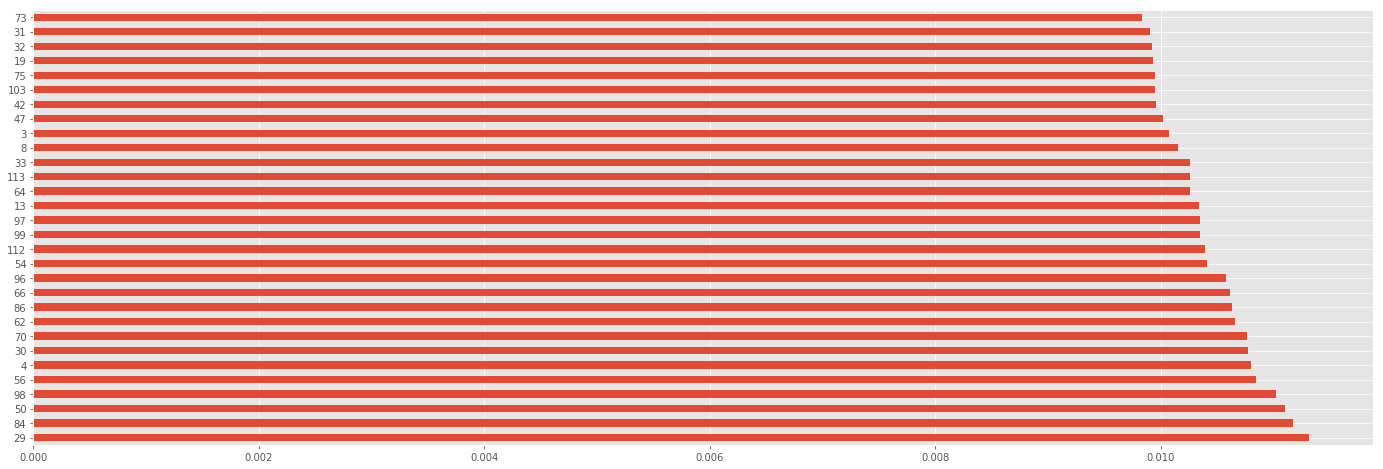

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_stats,y_stats)
print(etc.feature_importances_)

feat_imp = pd.Series(etc.feature_importances_)
f = feat_imp.nlargest(30)
index_f = list(pd.DataFrame(f).index.values)
plt.rcParams["figure.figsize"] = (24,8)
f.plot(kind = 'barh')
plt.show()


In [32]:
ind = [value for value in index_sc_table if value in index_f]
#ind = [102, 110, 109, 105]
col = pd.DataFrame(dataset).columns.tolist()
col = [col[i] for i in ind]

In [35]:
col = ['system.cpu.dcache.demand_hits::total', 'system.cpu.dcache.demand_misses::total',
 'system.cpu.dcache.demand_mshr_miss_latency::total',
 'system.cpu.dcache.demand_accesses::total']
col

['system.cpu.dcache.demand_hits::total',
 'system.cpu.dcache.demand_misses::total',
 'system.cpu.dcache.demand_mshr_miss_latency::total',
 'system.cpu.dcache.demand_accesses::total']

In [36]:
ind = [35, 39, 62, 47]

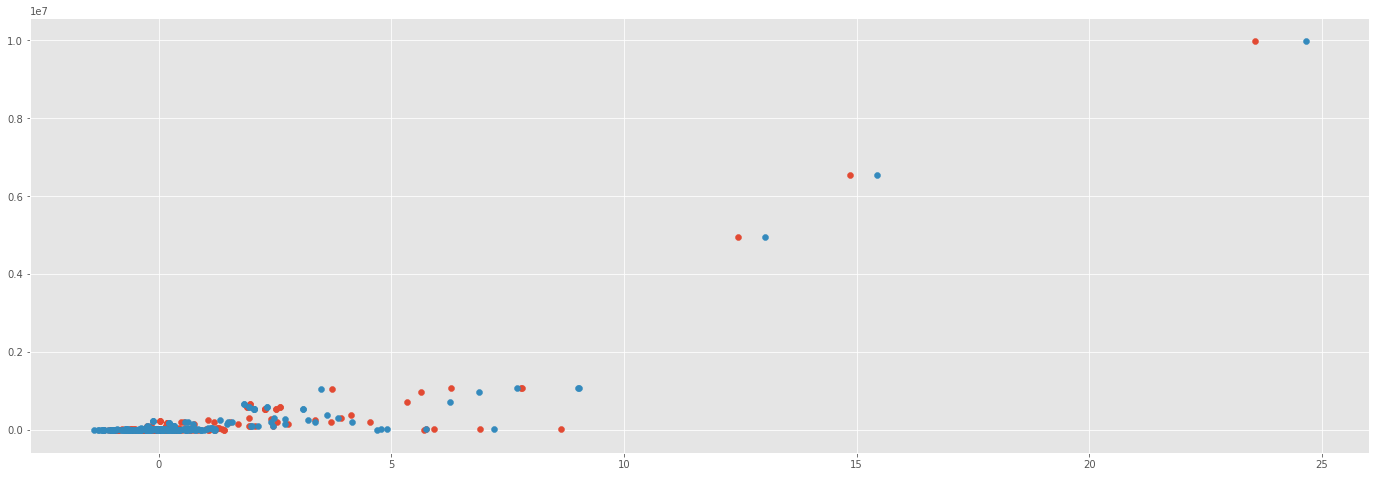

    ML_regressor system.cpu.dcache.demand_hits::total
0       AdaBoost                   0.8680578864810571
1  Decision Tree                   0.8737137857621253
2  Random Forest                   0.9528933485932021
3            SVR                 0.053161866834976805
4           K-NN                   0.6145725597713536
5    Naive_Bayes                 0.046153846153846156


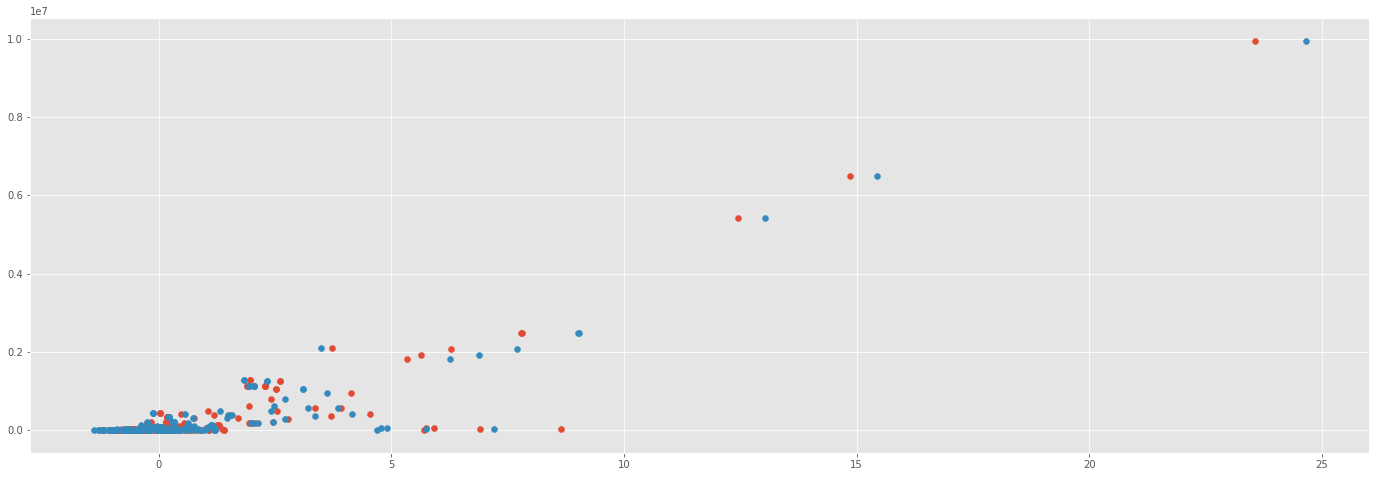

    ML_regressor system.cpu.dcache.demand_misses::total
0       AdaBoost                     0.8637108732063363
1  Decision Tree                     0.8494589722742317
2  Random Forest                     0.8955261635782665
3            SVR                   -0.02302481807426804
4           K-NN                     0.7111348444671146
5    Naive_Bayes                    0.03076923076923077


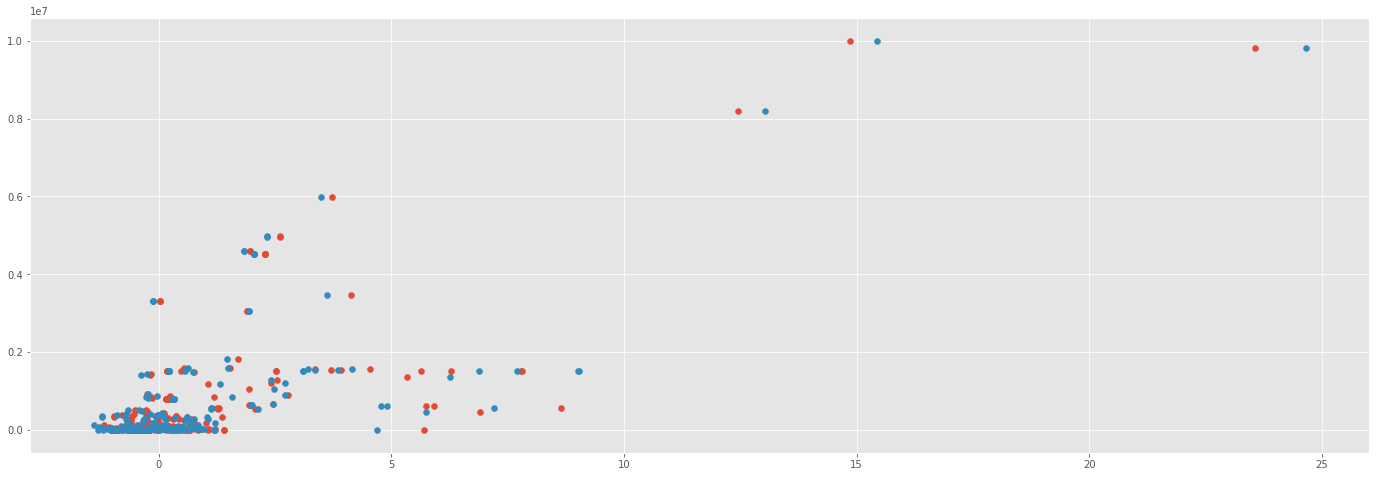

    ML_regressor system.cpu.dcache.demand_mshr_miss_latency::total
0       AdaBoost                                0.7044835462131973
1  Decision Tree                                0.7790360180895295
2  Random Forest                                0.7758603935822618
3            SVR                              -0.19055157352282448
4           K-NN                                0.5569703311148634
5    Naive_Bayes                              0.046153846153846156


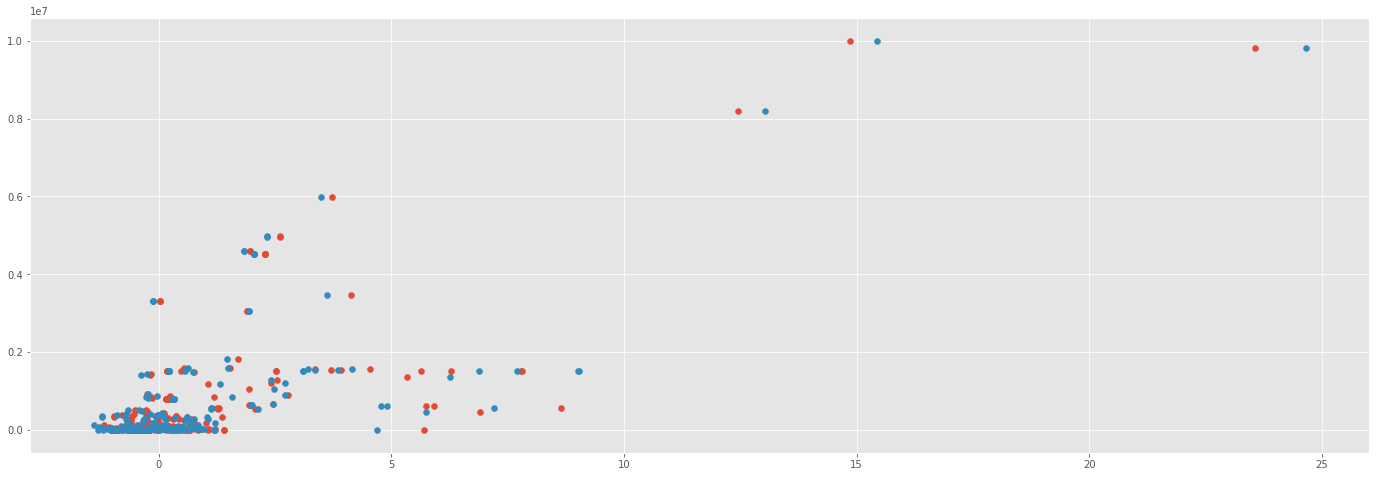

    ML_regressor system.cpu.dcache.demand_accesses::total
0       AdaBoost                       0.6863635833039906
1  Decision Tree                       0.7790715006763186
2  Random Forest                        0.775675864001064
3            SVR                     -0.19058886097893524
4           K-NN                       0.5569784707965881
5    Naive_Bayes                      0.03076923076923077


In [38]:
# x will be the write latency, y will be the write energy, and z will be the respective feature column
c = []
for index, i in enumerate(range(len(ind))):
    feat = ind[i]
    X = Data.iloc[:,[-2, -1]]
    X = np.nan_to_num(X)
    X = pd.DataFrame(X)
    y = X_stats.iloc[:, feat]
    y = (y*10e6).astype(int)
    Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
    Xy.columns = ['WrEnergy', 'WrLat', 'feat']
    plt.scatter(X.iloc[:, 0].values, y)
    plt.scatter(X.iloc[:, 1].values, y)
    plt.show()
    x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    pipeline_feat_RF= Pipeline([('classifier_feat_RF', RandomForestRegressor(n_estimators = 300, random_state = 0))])
    pipeline_feat_SVR = Pipeline([('classifier_feat_SVC', SVR(C = 1, kernel = 'poly', gamma =0.1))])
    pipeline_feat_Knn = Pipeline([('classifier_feat_Knn', KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2))])
    pipeline_feat_Naive_Bayes = Pipeline([('classifier_feat_Naive_Bayes', GaussianNB())])
    pipeline_feat_DT= Pipeline([('classifier_feat_DT', DecisionTreeRegressor(criterion = 'mse', random_state = 0 ))])
    pipeline_feat_Ada= Pipeline([('classifier_feat_Ada', AdaBoostRegressor())])

    pipe_feat_list = [pipeline_feat_Ada, pipeline_feat_DT, pipeline_feat_RF, pipeline_feat_SVR, pipeline_feat_Knn, pipeline_feat_Naive_Bayes]
    pipe_feat_dict = {0: 'DecisionTree_Feat', 1: 'RandomForest_Feat', 2: 'AdaBoost_Feat', 3: 'SVC_Feat', 4: 'K-NN_Feat', 5: 'Naive_Bayes_Feat'}
    
    import pickle
    for i, pipe in enumerate(pipe_feat_list):
        pipe.fit(x_feat_train, y_train)
        #with open('{}.sav'.format(i), 'wb') as RF:
        #  pickle.dump(pipe, RF)
    
    Feat_table = []
    for model in pipe_feat_list:
        accuracy = '{}_{}_accuracy {}'.format(i, pipe_feat_dict[i], model.score(x_feat_test, y_test))
        Feat_table.append(accuracy.split(' ')[1])
    
    col_1 = ['AdaBoost', 'Decision Tree', 'Random Forest', 'SVR', 'K-NN', 'Naive_Bayes' ]
    col_2 = Feat_table
    Final_table = pd.concat([pd.DataFrame(col_1), pd.DataFrame(col_2)], axis = 1, ignore_index = True)
    Final_table.columns = ['ML_regressor' ,col[index]]
    c.append([col[index],col_2])
    print(Final_table)
    

In [40]:
c0, c1, c2, c3=c[0], c[1], c[2], c[3]
accuracy_final_table=pd.concat([pd.DataFrame(col_1), pd.DataFrame(c[0][1]),  pd.DataFrame(c[1][1]),  pd.DataFrame(c[2][1]),pd.DataFrame(c[3][1]) ], axis = 1)
accuracy_final_table.columns = ['ML Algorithm', c[0][0],c[1][0],c[2][0], c[3][0] ]

In [42]:
accuracy_final_table

,ML Algorithm,system.cpu.dcache.demand_hits::total,system.cpu.dcache.demand_misses::total,system.cpu.dcache.demand_mshr_miss_latency::total,system.cpu.dcache.demand_accesses::total
0,AdaBoost,0.8680578864810571,0.8637108732063363,0.7044835462131973,0.6863635833039906
1,Decision Tree,0.8737137857621253,0.8494589722742317,0.7790360180895295,0.7790715006763186
2,Random Forest,0.9528933485932021,0.8955261635782665,0.7758603935822618,0.775675864001064
3,SVR,0.053161866834976805,-0.02302481807426804,-0.19055157352282448,-0.19058886097893524
4,K-NN,0.6145725597713536,0.7111348444671146,0.5569703311148634,0.5569784707965881
5,Naive_Bayes,0.046153846153846156,0.03076923076923077,0.046153846153846156,0.03076923076923077


It is pretty clear from the results we have got from above that the Random Forest Regressor is the appropriate one to predict these features.

C:\Users\gaura\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


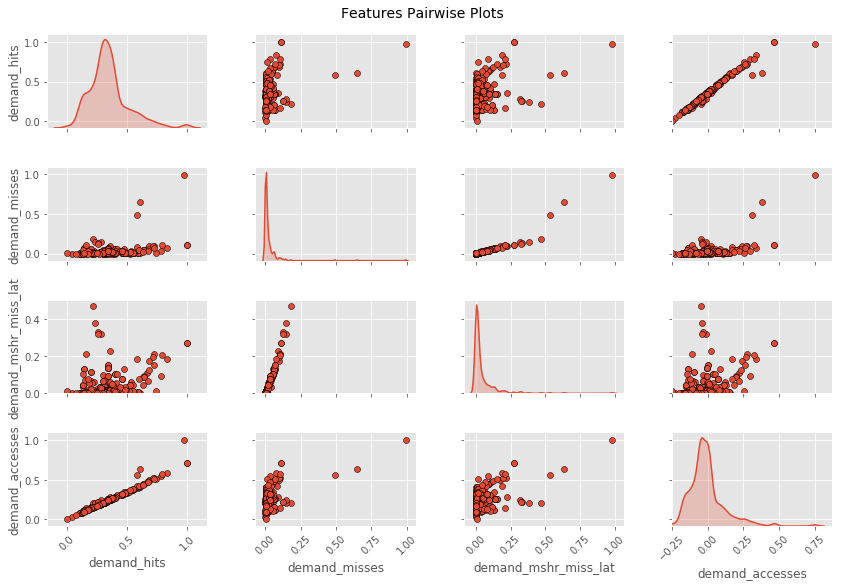

In [43]:
d = X_stats.loc[:, ['system.cpu.dcache.demand_hits::total', 'system.cpu.dcache.demand_misses::total', 'system.cpu.dcache.demand_mshr_miss_latency::total', 'system.cpu.dcache.demand_accesses::total']]
#d=['system.cpu.dcache.demand_hits::total', 'system.cpu.dcache.demand_misses::total', 'system.cpu.dcache.demand_mshr_misses::total', 'system.cpu.dcache.demand_mshr_miss_latency::total']
d1 = ['demand_hits', 'demand_misses', 'demand_mshr_miss_lat', 'demand_accesses']
X_plot = d
X_plot.columns = ['demand_hits', 'demand_misses', 'demand_mshr_miss_lat', 'demand_accesses']

pp = sns.pairplot(X_plot[d1], size=2, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
#pp.set_xticklabels(pp.get_xticklabels(), rotation=45)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Features Pairwise Plots', fontsize=14)
pp.fig.draw(
    pp.fig.canvas.get_renderer()
)  # required, as matplotlib calculates ticks during draw time
for ax in pp.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylim(0, 0.5)
plt.xlim(0, None)
fig.savefig(r"C:\Users\gaura\OneDrive\Desktop\SUBJECTS\523\project\plots\feature_comparison.png")

### creating seperate RF model for features giving WL and WE as input

In [ ]:
feat = ind[0]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_ind0 = RandomForestRegressor(n_estimators = 300, random_state = 0).fit(x_feat_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters = [
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mse'], 'max_features' : ['sqrt'], 'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'], 'max_features' : ['log2'], 'random_state' : [0]},
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mae'], 'max_features' : ['sqrt'],  'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'], 'max_features' : ['log2'],  'random_state' : [0]}]

GS_cv = GridSearchCV(estimator = rf_ind0, param_grid = parameters, 
                          cv = 10, n_jobs = -1, verbose = 2)
GS_cv.fit(x_feat_train, y_train)
GS_cv.best_params_

In [ ]:
feat = ind[1]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_ind1 = RandomForestRegressor(n_estimators = 300, random_state = 0).fit(x_feat_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters = [
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mse'], 'max_features' : ['sqrt'], 'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'], 'max_features' : ['log2'], 'random_state' : [0]},
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mae'], 'max_features' : ['sqrt'],  'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'], 'max_features' : ['log2'],  'random_state' : [0]}]

GS_cv = GridSearchCV(estimator = rf_ind0, param_grid = parameters, 
                          cv = 10, n_jobs = -1, verbose = 2)
GS_cv.fit(x_feat_train, y_train)
GS_cv.best_params_

In [ ]:
feat = ind[2]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_ind2 = RandomForestRegressor(n_estimators = 300, random_state = 0).fit(x_feat_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters = [
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mse'], 'max_features' : ['sqrt'], 'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'], 'max_features' : ['log2'], 'random_state' : [0]},
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mae'], 'max_features' : ['sqrt'],  'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'], 'max_features' : ['log2'],  'random_state' : [0]}]

GS_cv = GridSearchCV(estimator = rf_ind0, param_grid = parameters, 
                          cv = 10, n_jobs = -1, verbose = 2)
GS_cv.fit(x_feat_train, y_train)
GS_cv.best_params_

In [ ]:
feat = ind[0]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_ind0 = RandomForestRegressor(n_estimators = 300, random_state = 0).fit(x_feat_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters = [
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mse'], 'max_features' : ['sqrt'], 'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mse'], 'max_features' : ['log2'], 'random_state' : [0]},
              {'n_estimators': [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'],'max_features' :['auto'], 'random_state' : [0] }, 
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion': ['mae'], 'max_features' : ['sqrt'],  'random_state' : [0]},
              {'n_estimators' : [20, 30, 50, 70, 100, 200, 300, 500, 1000], 'criterion' : ['mae'], 'max_features' : ['log2'],  'random_state' : [0]}]

GS_cv = GridSearchCV(estimator = rf_ind0, param_grid = parameters, 
                          cv = 10, n_jobs = -1, verbose = 2)
GS_cv.fit(x_feat_train, y_train)
GS_cv.best_params_

In [ ]:
# tuned models

feat = ind[0]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_0 = RandomForestRegressor(n_estimators = 1000, criterion = 'mae', random_state = 0).fit(x_feat_train, y_train)
y_pred_0 = rf_0.predict(X_LE_test.iloc[:,[-2,-1]])
y_true_0 = pd.DataFrame(y).iloc[int(Data.shape[0]*0.75)+1:,:].reset_index(drop=True)

In [ ]:
# tuned models

feat = ind[1]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_1 = RandomForestRegressor(n_estimators = 1000, criterion = 'mae', random_state = 0).fit(x_feat_train, y_train)
y_pred_1 = rf_1.predict(X_LE_test.iloc[:,[-2,-1]])
y_true_1 = pd.DataFrame(y).iloc[int(Data.shape[0]*0.75)+1:,:].reset_index(drop=True)

In [ ]:
# tuned models

feat = ind[2]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_2 = RandomForestRegressor(n_estimators = 1000, criterion = 'mae', max_features = 'sqrt', random_state = 0).fit(x_feat_train, y_train)
y_pred_2 = rf_2.predict(X_LE_test.iloc[:,[-2,-1]])
y_true_2 = pd.DataFrame(y).iloc[int(Data.shape[0]*0.75)+1:,:].reset_index(drop=True)

In [ ]:
# tuned models

feat = ind[3]
X = Data.iloc[:,[-2, -1]]
y = X_stats.iloc[:, feat]
y = (y*10e6).astype(int)
Xy = pd.concat([pd.DataFrame(X), pd.DataFrame(y)],axis=1)
Xy.columns = ['WrEnergy', 'WrLat', 'feat']
x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

rf_3 = RandomForestRegressor(n_estimators = 1000, criterion = 'mae', random_state = 0).fit(x_feat_train, y_train)
y_pred_3 = rf_3.predict(X_LE_test.iloc[:,[-2,-1]])
y_true_3 = pd.DataFrame(y).iloc[int(Data.shape[0]*0.75)+1:,:].reset_index(drop=True)

In [ ]:
test_table = pd.concat([pd.DataFrame(y_pred_0), pd.DataFrame(y_pred_1),pd.DataFrame(y_pred_2),pd.DataFrame(y_pred_3)],axis=1, ignore_index=True)
test_table.columns = ['d_cache demand_hits', 'd_cache demand_misses','d_cache demand_mshr_miss_lat','d_cache demand_accesses']
test_table.head()

## Final Regressor

In [ ]:
X_final = X_stats.loc[:, ['system.cpu.dcache.demand_hits::total'
'system.cpu.dcache.demand_misses::total',
'system.cpu.dcache.demand_mshr_miss_latency::total',
'system.cpu.dcache.demand_accesses::total']]
X_final = pd.DataFrame(X_final).fillna(X_final.mean())
X_final = np.nan_to_num(X_final)
X_final = pd.DataFrame(X_final)
#X_final.columns = (Dataset.iloc[:,0:-1]).columns
y_final = y_stats

x_feat_train, x_feat_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 0)
    
pipeline_feat_RF= Pipeline([('classifier_feat_RF', RandomForestRegressor(n_estimators = 1000, random_state = 0))])
pipeline_feat_SVR = Pipeline([('classifier_feat_SVC', SVR(C = 1, kernel = 'poly', gamma =0.1))])
pipeline_feat_Knn = Pipeline([('classifier_feat_Knn', KNeighborsRegressor(n_neighbors = 1, metric = 'minkowski', p = 2))])
pipeline_feat_Naive_Bayes = Pipeline([('classifier_feat_Naive_Bayes', GaussianNB())])
pipeline_feat_DT= Pipeline([('classifier_feat_DT', DecisionTreeRegressor(criterion = 'mse', random_state = 0 ))])
pipeline_feat_Ada= Pipeline([('classifier_feat_Ada', AdaBoostRegressor())])

pipe_feat_list = [pipeline_feat_Ada, pipeline_feat_DT, pipeline_feat_RF, pipeline_feat_SVR, pipeline_feat_Knn, pipeline_feat_Naive_Bayes]
pipe_feat_dict = {0: 'DecisionTree_Feat', 1: 'RandomForest_Feat', 2: 'AdaBoost_Feat', 3: 'SVC_Feat', 4: 'K-NN_Feat', 5: 'Naive_Bayes_Feat'}

for pipe in pipe_feat_list:
    pipe.fit(x_feat_train, y_train)

Feat_table = []
for i,model in enumerate(pipe_feat_list):
    accuracy = '{}_accuracy {}'.format(pipe_feat_dict[i], model.score(x_feat_test, y_test))
    print(accuracy)
    Feat_table.append(accuracy.split(' ')[1])
pd.DataFrame(Feat_table)

In [ ]:
scores = []
for i in range(1,20):
    kNN = KNeighborsRegressor(n_neighbors = i, metric = 'minkowski', p = 2).fit(x_feat_train, y_train)
    scores.append(kNN.score(x_feat_test, y_test))

plt.plot(range(1,20), scores)    
    

In [ ]:
kNN = KNeighborsRegressor(n_neighbors = 13, metric = 'minkowski', p = 2).fit(x_feat_train, y_train)
kNN.score(x_feat_test, y_test)
